<h1><b>Importing the necessary libraries</b></h1>

In [144]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
train="/content/drive/My Drive/toy_train"

In [147]:
test="/content/drive/My Drive/toy_val"

<h1><b>Importing the training and testing data and converting into TensorFlow datasets</b></h1>

In [148]:
train = tf.keras.utils.image_dataset_from_directory(train)


Found 1000 files belonging to 2 classes.


In [149]:
test= tf.keras.utils.image_dataset_from_directory(test)


Found 198 files belonging to 2 classes.


In [150]:
#Generating a single batch of size 32 from training data
batch = train.as_numpy_iterator().next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


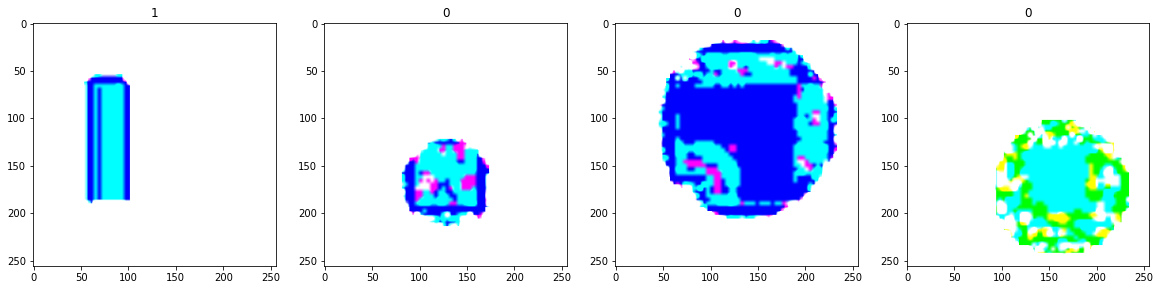

In [151]:
#Visualising some sample images from the training to understand the labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

So we can see that 1 represents squares,
and 0 represents circles.

<h1><b>Scaling the data</b></h1>

In [152]:
train = train.map(lambda x,y: (x/255, y))

In [153]:
test=test.map(lambda x,y:(x/255,y))

<h1><b>Building the Convolutional Neural Network</b></h1>

In [154]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [155]:
def create_model():
  model = Sequential()

  model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
  model.add(MaxPooling2D())

  model.add(Conv2D(32, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D())

  model.add(Conv2D(16, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D())

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

  model.summary()

  return model

In [156]:
model=create_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

<b>Fitting the model</b>

In [157]:
history = model.fit(train, epochs=20,validation_data=test)

Epoch 1/20
32/32 [==============================] - 52s 2s/step - loss: 0.6974 - accuracy: 0.6940 - val_loss: 0.4027 - val_accuracy: 0.8333
Epoch 2/20
32/32 [==============================] - 52s 2s/step - loss: 0.3889 - accuracy: 0.8380 - val_loss: 0.3534 - val_accuracy: 0.8485
Epoch 3/20
32/32 [==============================] - 50s 2s/step - loss: 0.3384 - accuracy: 0.8490 - val_loss: 0.3306 - val_accuracy: 0.8384
Epoch 4/20
32/32 [==============================] - 60s 2s/step - loss: 0.3201 - accuracy: 0.8540 - val_loss: 0.3330 - val_accuracy: 0.8434
Epoch 5/20
32/32 [==============================] - 52s 2s/step - loss: 0.2995 - accuracy: 0.8570 - val_loss: 0.3363 - val_accuracy: 0.8586
Epoch 6/20
32/32 [==============================] - 51s 2s/step - loss: 0.2744 - accuracy: 0.8730 - val_loss: 0.3192 - val_accuracy: 0.8434
Epoch 7/20
32/32 [==============================] - 53s 2s/step - loss: 0.2168 - accuracy: 0.8960 - val_loss: 0.3424 - val_accuracy: 0.8485
Epoch 8/20
32/32 [==

<h1><b>Plotting the loss and accuracy of the trained model</b></h1>

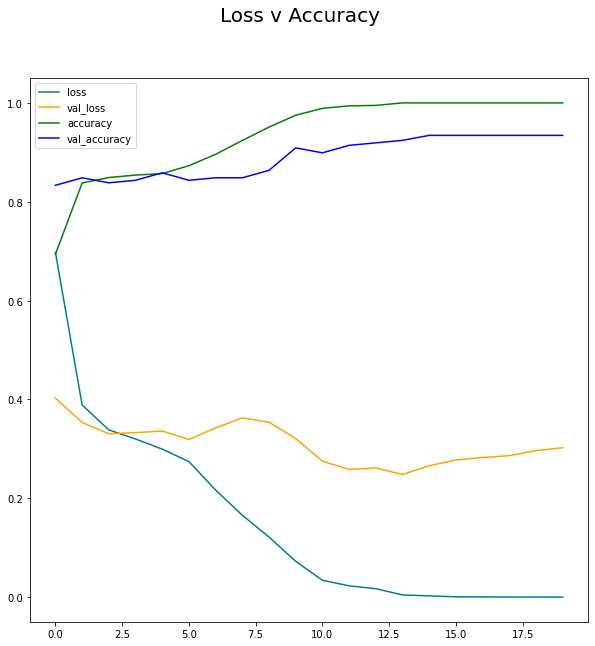

In [158]:
fig = plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.plot(history.history['accuracy'], color='green', label='accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Loss v Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<h1><b>Creating a class to classify random images</b></h1>

In [217]:
circle='/content/drive/My Drive/circle_test.jpg'

In [218]:
rect='/content/drive/My Drive/rectangle_test.jpg'

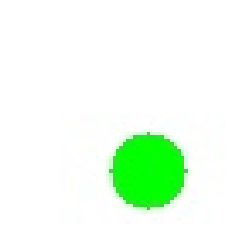

In [219]:
circle=cv2.imread(circle)
plt.imshow(circle)
plt.axis('off')
plt.show()

In [220]:
#Resizing and scaling the image
circle=tf.image.resize(circle,(256,256))
y_pred=model.predict(np.expand_dims(circle/255.0,0))

In [221]:
label='Rectangle' if y_pred >=0.5 else 'Circle'
print(label)

Circle
